In [1228]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as mtp 
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from kneed import KneeLocator





In [1229]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [1230]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [1231]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [1232]:
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

In [1233]:
df.set_index('ID',inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [1234]:
print("unique_cc1",df.cc1_miles.unique())
print("unique_cc2",df.cc2_miles.unique())
print("unique_cc3",df.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [1235]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [1236]:
print("unique Award",df.Award.unique())

unique Award [0 1]


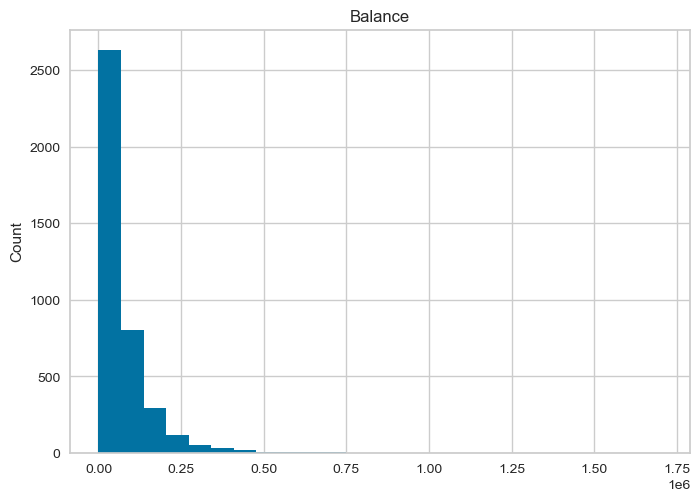

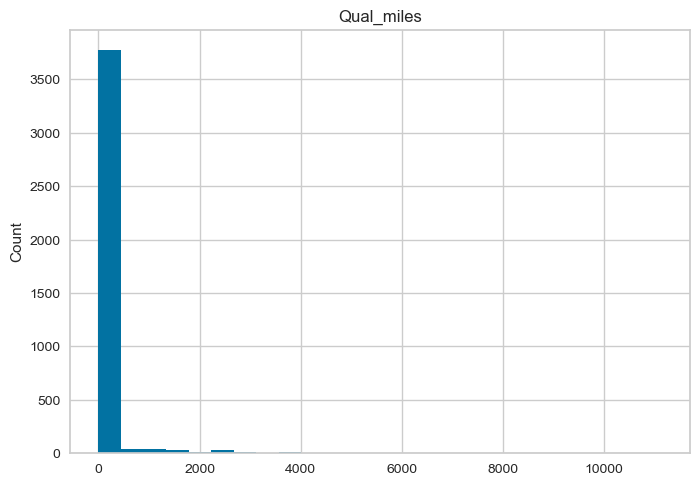

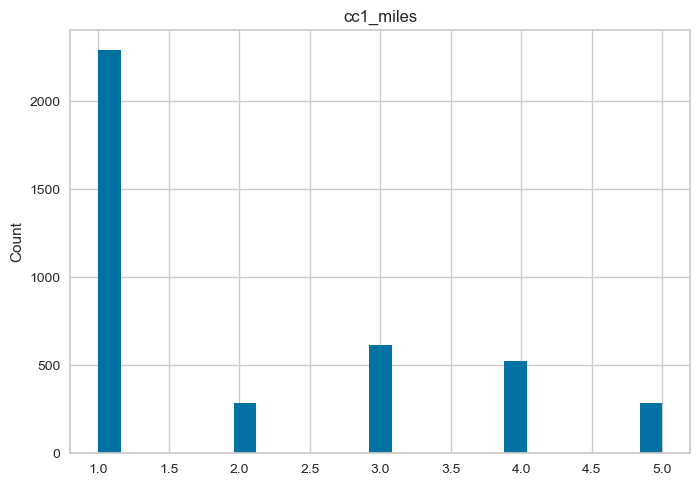

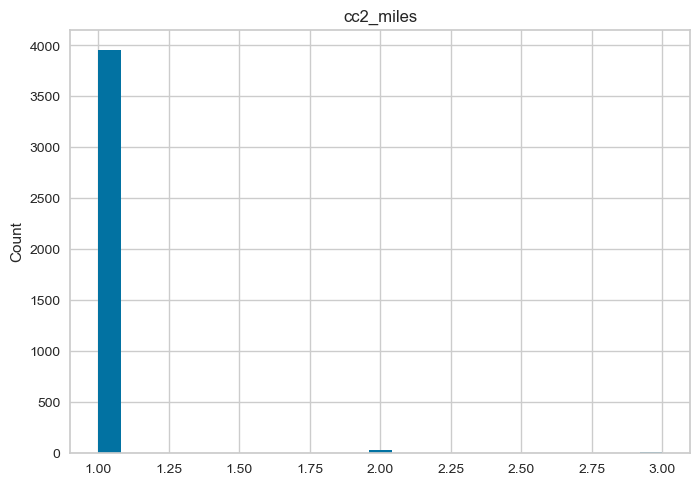

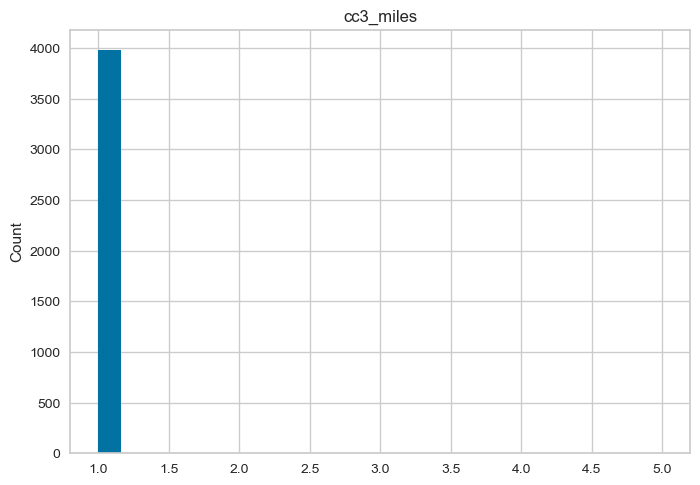

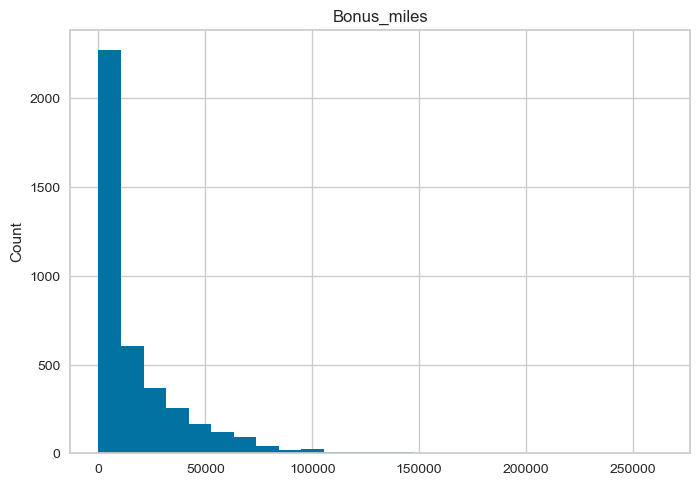

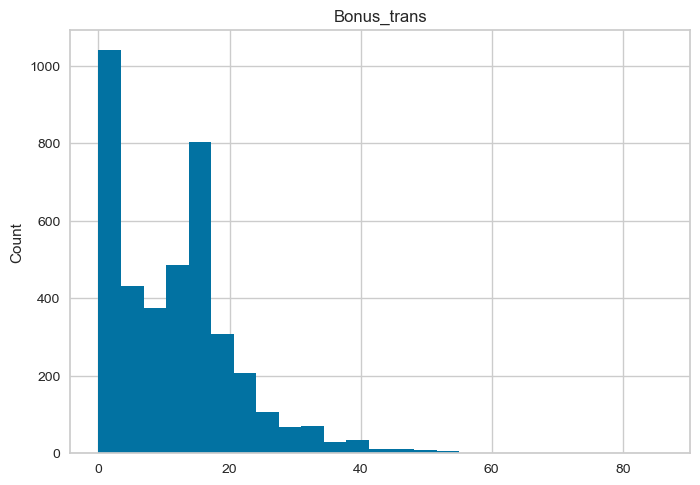

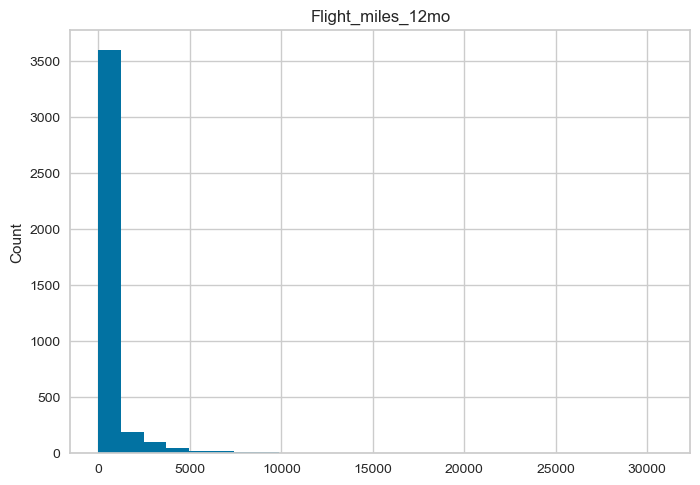

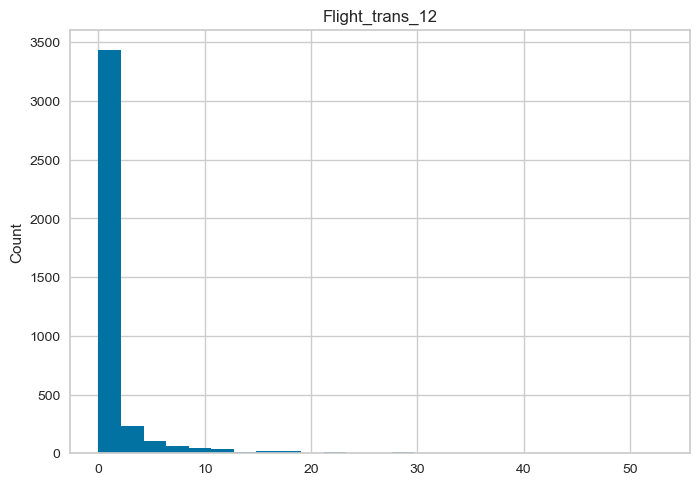

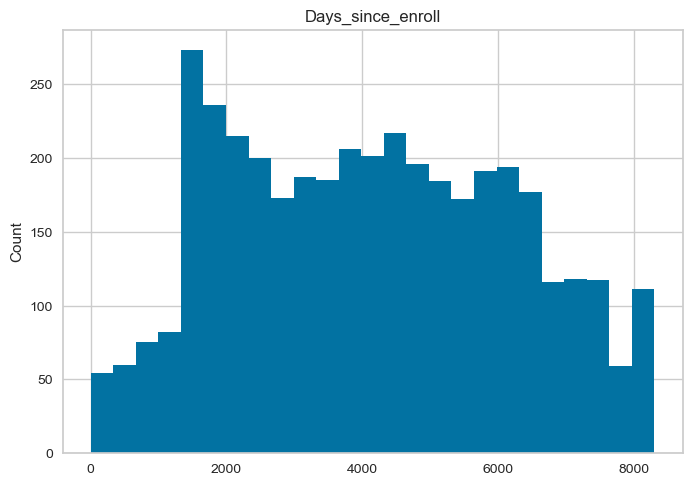

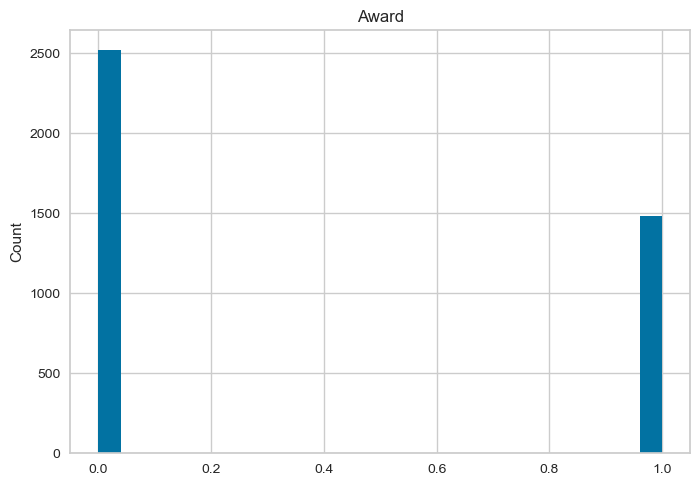

In [1237]:
for feature in data.columns:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [1238]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

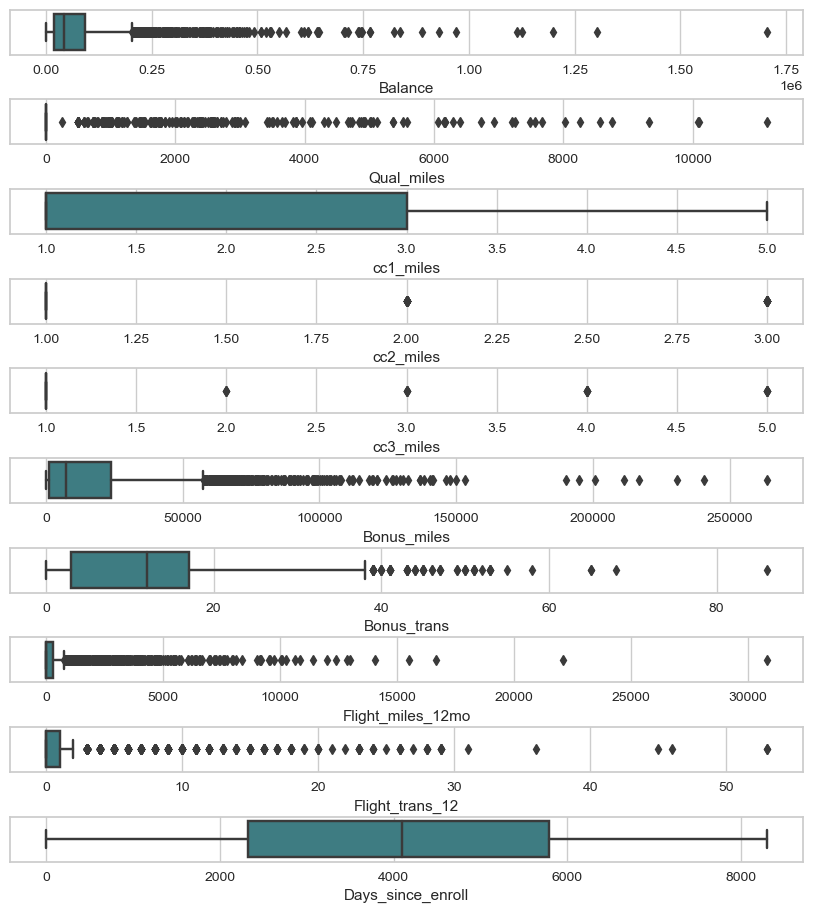

In [1239]:
outlier = df.copy() 
fig, axes=plt.subplots(10,1,figsize=(8,9),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=outlier,palette='crest',ax=axes[9])
plt.tight_layout(pad=0.2)


<Axes: >

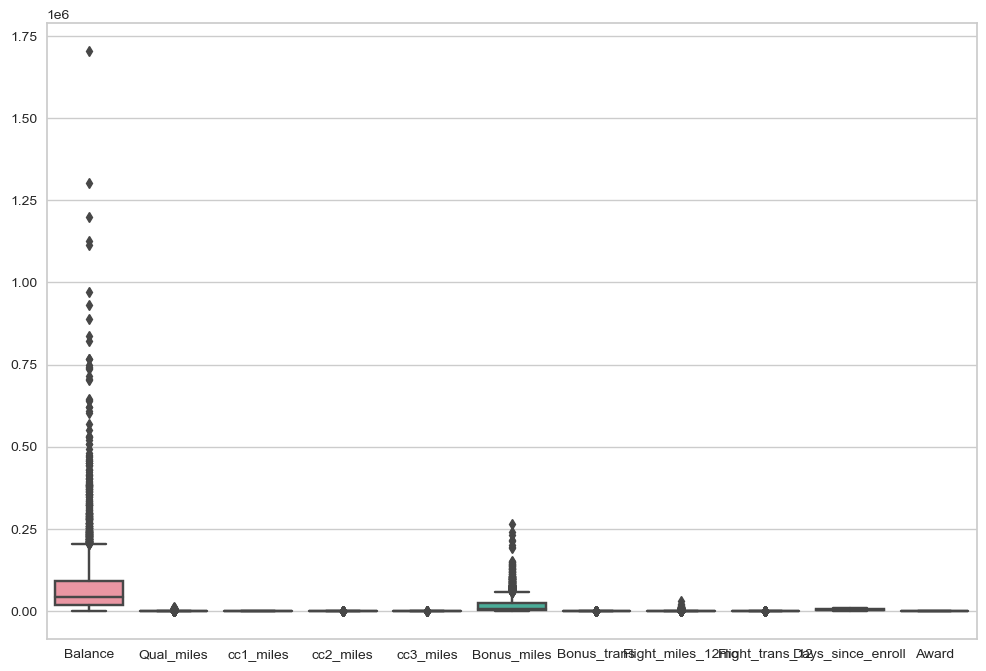

In [1240]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=df)


<Axes: >

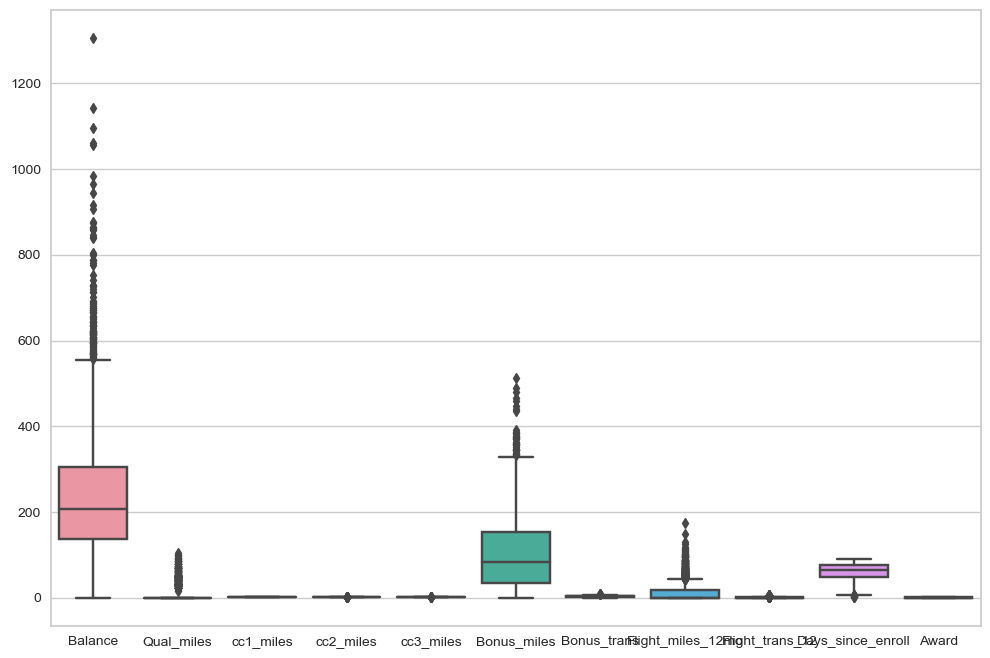

In [1241]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df))

In [1242]:
countnotermdeposit = len(df[df.Award == 0])

In [1243]:
countnotermdeposit 

2518

In [1244]:
print("customer have not award",(countnotermdeposit / len(df.Award)*100))

customer have not award 62.96574143535884


In [1245]:
counthavetermdeposit = len(df[df.Award == 1])
counthavetermdeposit

1481

In [1246]:
print("customer have a award",(counthavetermdeposit / len(df.Award)*100))

customer have a award 37.034258564641156


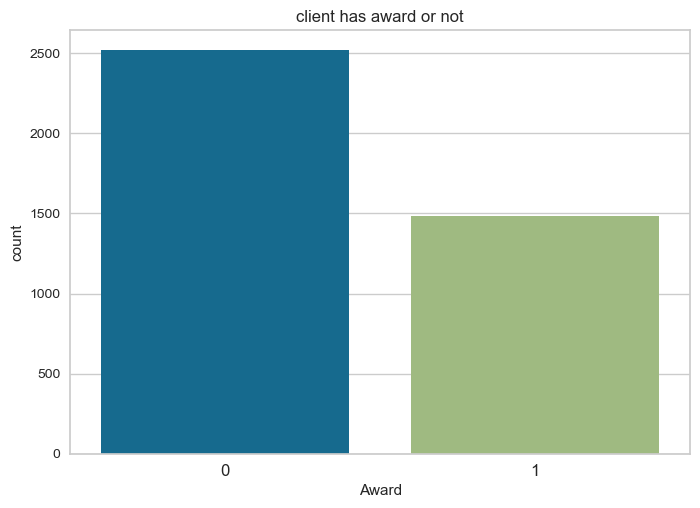

In [1247]:
sns.countplot(data=df,x='Award')
plt.xticks(fontsize = 12)
plt.title('client has award or not')
plt.show()


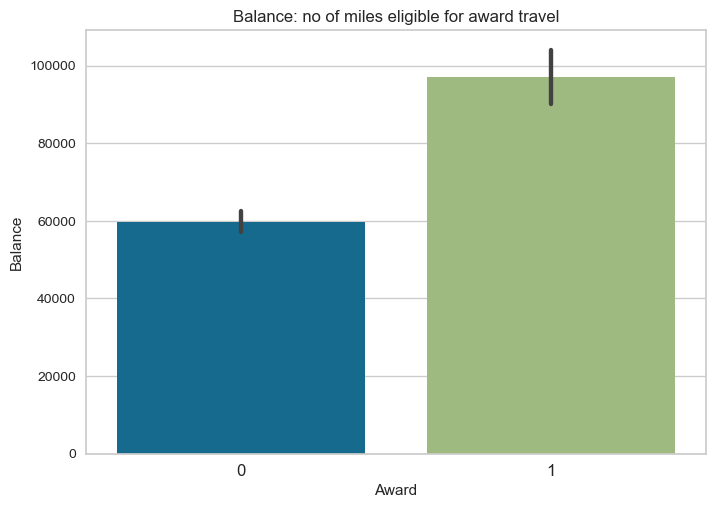

In [1248]:
Balance = df[['Award','Balance']]
sns.barplot(data=Balance,x='Award',y='Balance')
plt.xticks(fontsize = 12)
plt.xlabel('Award')
plt.ylabel('Balance')
plt.title('Balance: no of miles eligible for award travel')
plt.show()

In [1249]:
corr_matrix =  df.corr()
corr_matrix['Balance'].sort_values(ascending=False)


Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

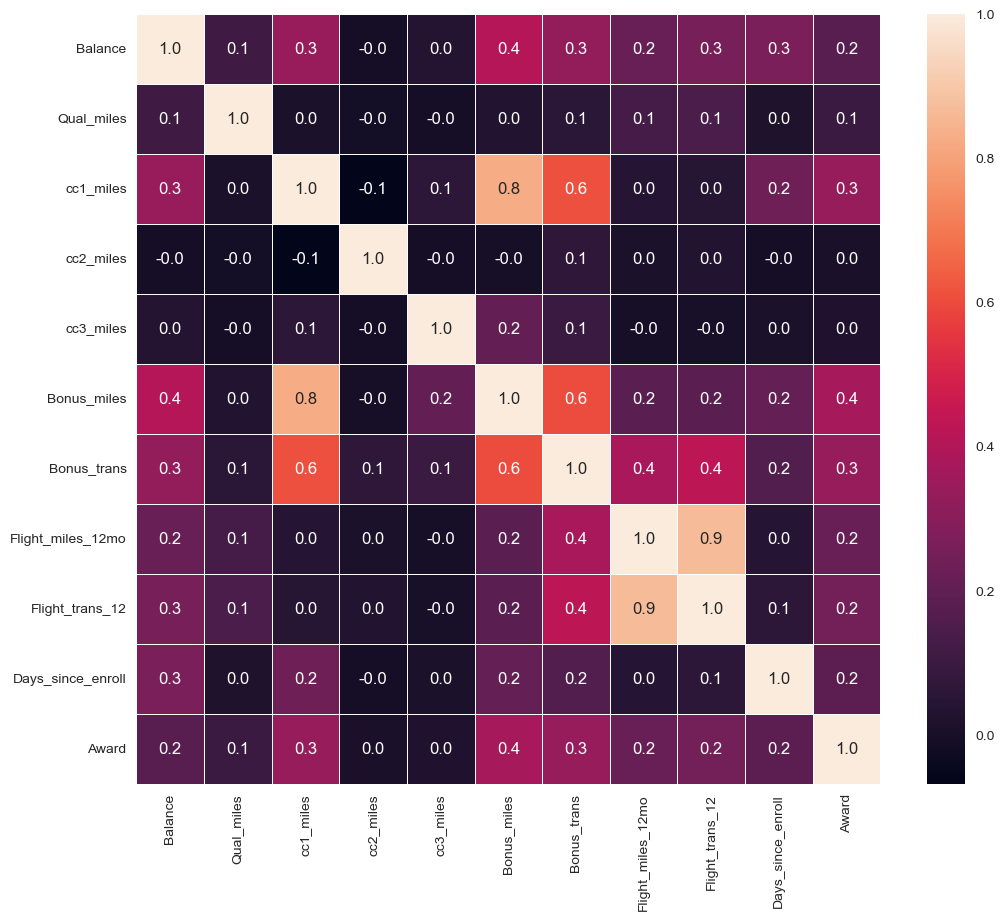

In [1250]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linewidths = .5, fmt ='.1f', ax=ax)
plt.show()

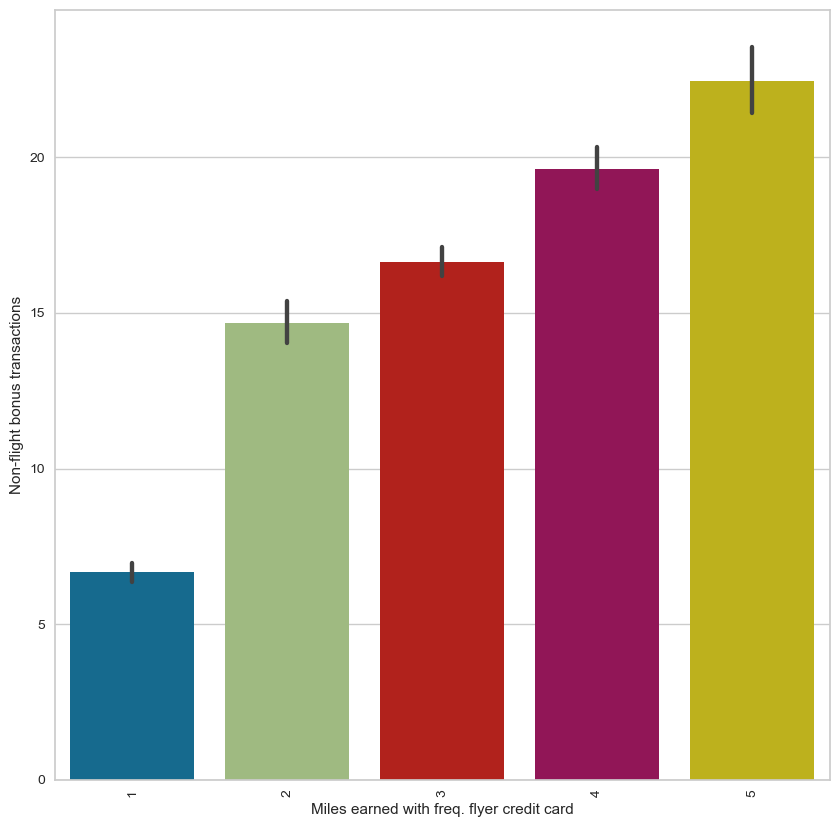

In [1251]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data = sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

In [1252]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(3999, 11)

In [1253]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(3999, 11)

In [1256]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,43989.000000
1,2,35409.516630
2,3,30899.271222
3,4,27154.267367
4,5,24884.045345
5,6,21479.981953
6,7,18891.991501
7,8,17316.763360
8,9,16043.402421
9,10,14732.130136


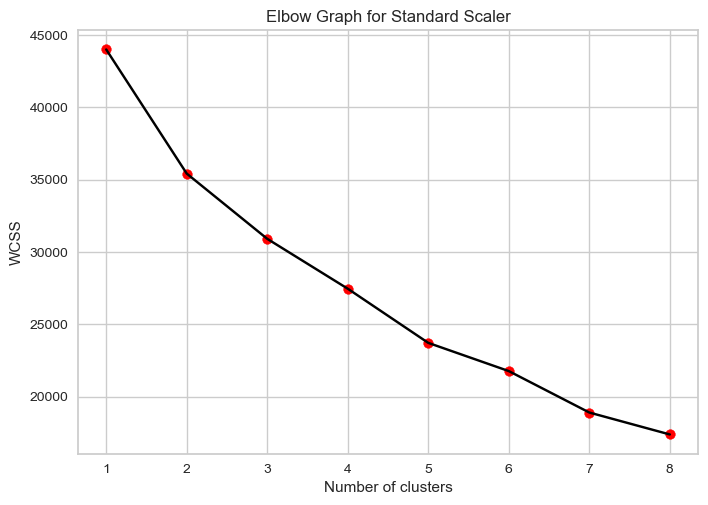

In [1257]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [1227]:
kl = KneeLocator(range(1,9),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [1074]:
from sklearn.metrics import silhouette_score

In [1258]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

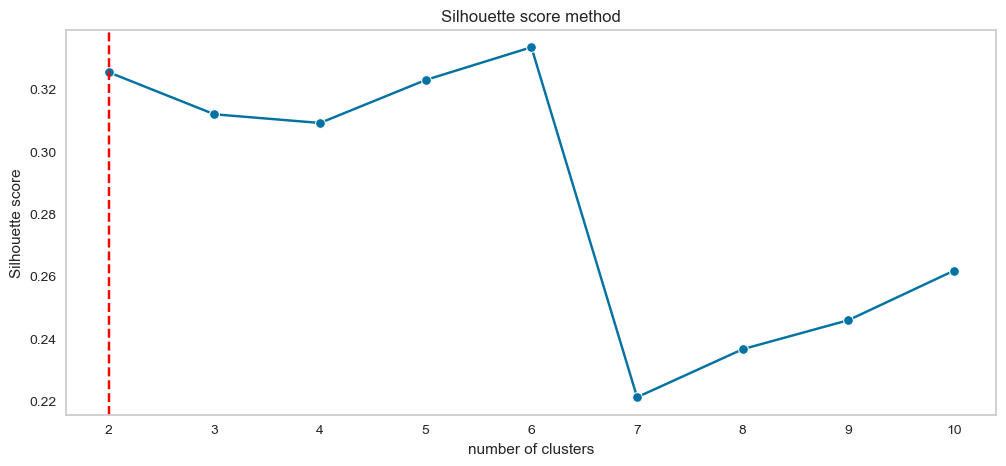

In [1259]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x= n_clusters, y = s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for Standard Scaler data


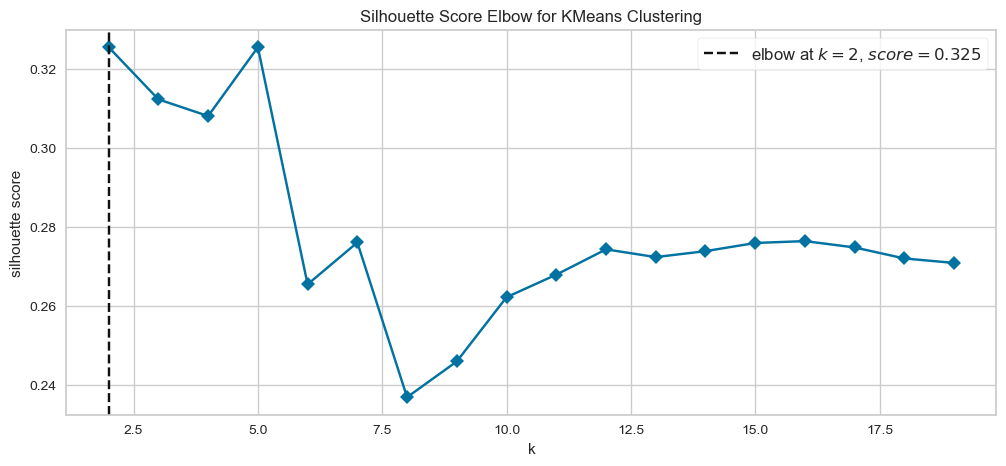

In [1260]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
fig, ax = plt.subplots(figsize=(12,5))
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_df)    
visualizer.poof()
plt.show()

In [1261]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')


In [1262]:

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)


Elbow Plot for Standard Scaler data


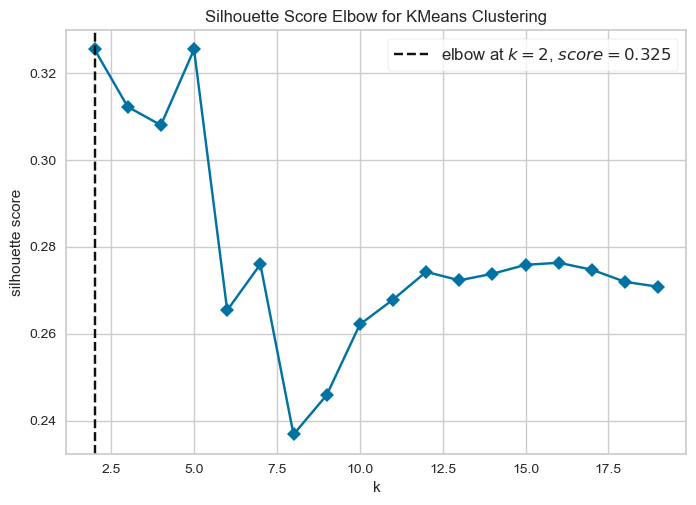

In [1263]:
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_df)    
visualizer.poof()
plt.show()

In [1268]:
# With the elbow method, the ideal number of clusters to use was 5.
# We will also use the Silhouette score to determine an optimal number.clust_list = [2,3,4,5,6,7,8,9]

# Silhouette score for standered scaler Applied on data .
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= silhouette_score(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.32542136327826215
For n_clusters = 3 The average silhouette_score is : 0.31191384766627117
For n_clusters = 4 The average silhouette_score is : 0.3099108192228768
For n_clusters = 5 The average silhouette_score is : 0.3353447174269873
For n_clusters = 6 The average silhouette_score is : 0.2788033904667631
For n_clusters = 7 The average silhouette_score is : 0.2836461929303771
For n_clusters = 8 The average silhouette_score is : 0.23655403102028674
For n_clusters = 9 The average silhouette_score is : 0.24591745011173718


In [1269]:
#higher silhouette_score is : 0.3353447174269873 for n_cluster = 5 

In [1270]:
model_kmeans = KMeans(n_clusters=5, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3999,)

In [1271]:
y_predict_kmeans

array([0, 0, 0, ..., 1, 0, 0])

In [1272]:
model_kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [1273]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[-0.29274668, -0.12929098, -0.59332752, -0.09824189, -0.06073222,
        -0.51295142, -0.48659601, -0.18668399, -0.19850319, -0.19654031,
        -0.34584353],
       [ 0.44464903, -0.11147744,  1.22052583, -0.09824189,  0.13648871,
         0.97101397,  0.77051034, -0.07690413, -0.085897  ,  0.3756233 ,
         0.58231353],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.38731797],
       [ 1.13686833,  0.4142613 ,  0.1345493 , -0.09824189, -0.06276658,
         0.65640088,  1.70548646,  3.77107713,  4.00212558,  0.27153799,
         0.88395812],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388]])

In [1274]:
model_kmeans.inertia_

24834.04425974534

In [1275]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df['Kmeans_label'] = model_kmeans.labels_

In [1276]:
df.groupby('Kmeans_label').mean()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_label,,,,,,,,,,,,
0,2230.252184,44103.274821,44.099285,1.242653,1.000000,1.000397,4758.121922,6.929309,198.691819,0.620731,3712.727959,0.203336
1,1595.653971,118405.526742,57.879254,3.739870,1.000000,1.038898,40592.841167,19.000810,352.387358,1.047812,4894.175041,0.651540
2,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
3,1743.867133,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
4,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


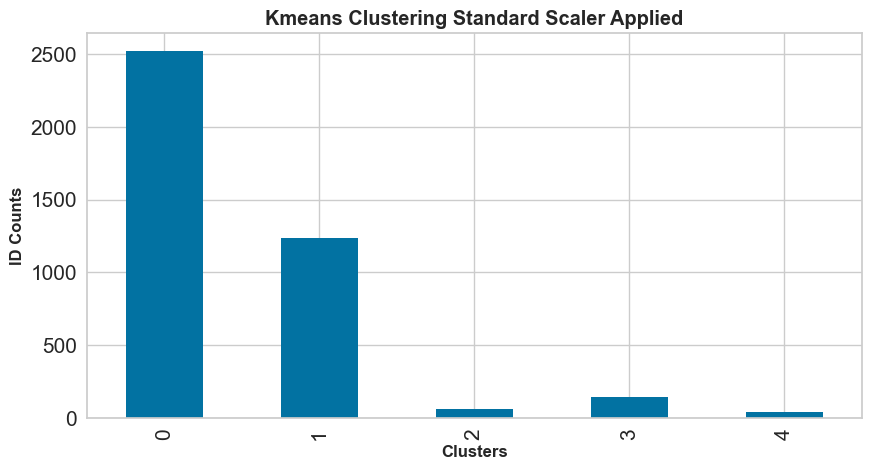

In [1277]:
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby(['Kmeans_label']).count()['ID'].plot(kind='bar', ax=ax)
plt.title('Kmeans Clustering Standard Scaler Applied', fontsize='large', fontweight='bold')
ax.set_xlabel('Clusters', fontsize='medium', fontweight='bold')
ax.set_ylabel('ID Counts', fontsize='medium', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


In [1278]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,1830.793213
1,2,823.675698
2,3,625.168488
3,4,436.708858
4,5,348.943428
5,6,315.148610
6,7,287.730869
7,8,263.048920
8,9,243.918201
9,10,226.118246


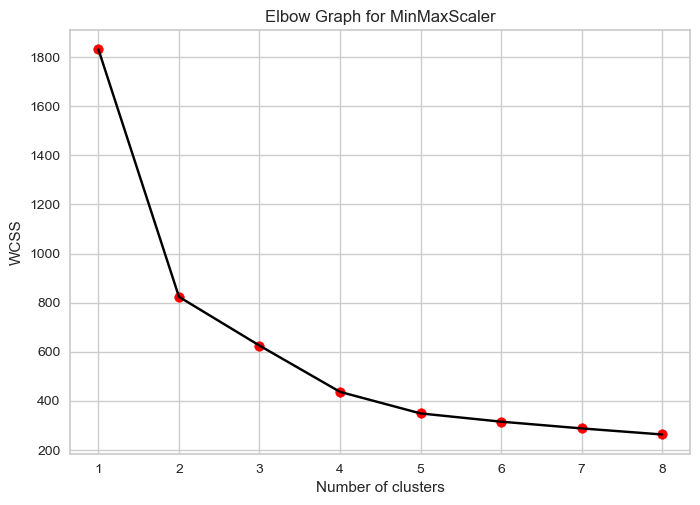

In [1279]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

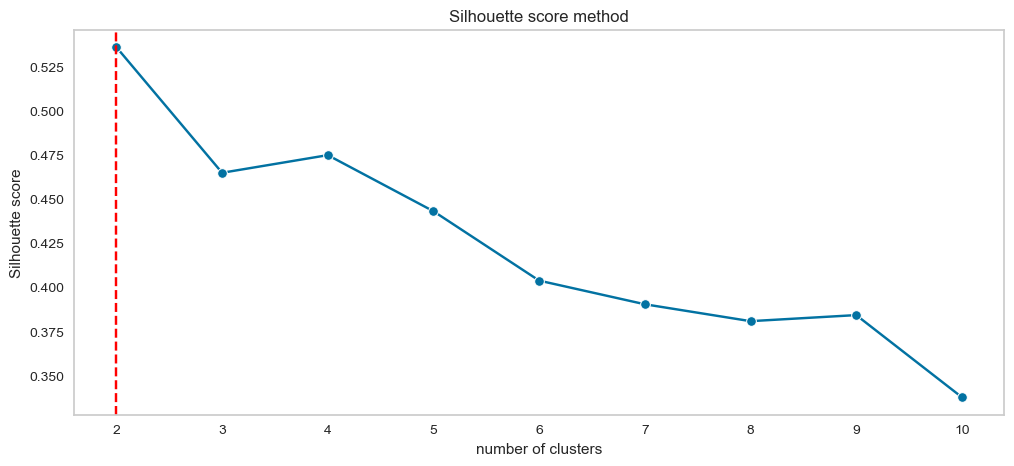

In [1280]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(minmax_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x = n_clusters,y = s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [1281]:
# With the elbow method, the ideal number of clusters to use was 2.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.535930510919477
For n_clusters = 3 The average silhouette_score is : 0.4646127065079619
For n_clusters = 4 The average silhouette_score is : 0.47483765255961
For n_clusters = 5 The average silhouette_score is : 0.4430672072796034
For n_clusters = 6 The average silhouette_score is : 0.4021621004641961
For n_clusters = 7 The average silhouette_score is : 0.3909601011818369
For n_clusters = 8 The average silhouette_score is : 0.38088072642749815
For n_clusters = 9 The average silhouette_score is : 0.38454330389289343


In [1089]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(3999,)

In [1090]:
y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [1283]:
# cluster centres associated with each lablesmodel_kmeans.labels_model_kmeans.cluster_centers_

model_kmeans.cluster_centers_

array([[-0.29274668, -0.12929098, -0.59332752, -0.09824189, -0.06073222,
        -0.51295142, -0.48659601, -0.18668399, -0.19850319, -0.19654031,
        -0.34584353],
       [ 0.44464903, -0.11147744,  1.22052583, -0.09824189,  0.13648871,
         0.97101397,  0.77051034, -0.07690413, -0.085897  ,  0.3756233 ,
         0.58231353],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.38731797],
       [ 1.13686833,  0.4142613 ,  0.1345493 , -0.09824189, -0.06276658,
         0.65640088,  1.70548646,  3.77107713,  4.00212558,  0.27153799,
         0.88395812],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388]])

In [1284]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

24834.04425974534

In [1285]:
#Assign clusters to the data set
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
data.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
data['Kmeans_label'] = model_kmeans.labels_

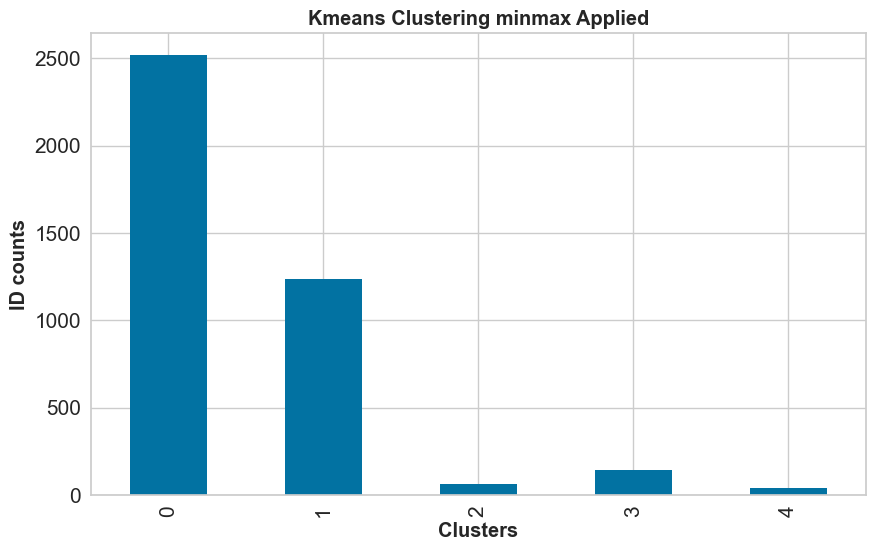

In [1286]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['Kmeans_label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering minmax Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [1287]:
# Group data by Clusters (K=2)
data.groupby('Kmeans_label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,
0,2230.252184,44103.274821,44.099285,1.242653,1.000000,1.000397,4758.121922,6.929309,198.691819,0.620731,3712.727959,0.203336
1,1595.653971,118405.526742,57.879254,3.739870,1.000000,1.038898,40592.841167,19.000810,352.387358,1.047812,4894.175041,0.651540
2,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
3,1743.867133,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
4,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


In [1288]:
#
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

n_clusters = [2, 3, 4, 5, 6, 7, 8]  # always start number from 2.
linkages = 'ward'



for n in n_clusters:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = silhouette_score(minmax_df, hie_labels1)
        print("For n_clusters =", n,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535930510919477
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.43550164891825044
For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42494300944261365
For n_clusters = 5 The average silhouette_score with linkage- ward : 0.3762586351398372
For n_clusters = 6 The average silhouette_score with linkage- ward : 0.33447794301195294
For n_clusters = 7 The average silhouette_score with linkage- ward : 0.32889569025182047
For n_clusters = 8 The average silhouette_score with linkage- ward : 0.3125764904816174


In [1289]:
#
n_clusters = [2, 3, 4, 5, 6, 7, 8]  # always start number from 2.
linkages = 'ward'



for n in n_clusters:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = silhouette_score(std_df, hie_labels1)
        print("For n_clusters =", n,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.28926595242577247
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2940432062008608
For n_clusters = 4 The average silhouette_score with linkage- ward : 0.30814152852022786
For n_clusters = 5 The average silhouette_score with linkage- ward : 0.3098805307874414
For n_clusters = 6 The average silhouette_score with linkage- ward : 0.3192511970153055
For n_clusters = 7 The average silhouette_score with linkage- ward : 0.18965334676868836
For n_clusters = 8 The average silhouette_score with linkage- ward : 0.1890586470843928


In [1290]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [1291]:
# Cluster numbers

agg_clustering.n_clusters_

2

In [1292]:
# Clustering Score

(sil(minmax_df, agg_clustering.labels_)*100).round(3)

53.593

In [1293]:
#Concating Labels with main dataset copy
df['Hierarchical_Labels'] = agg_clustering.labels_
df.groupby('Hierarchical_Labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,0.268070
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,0.865631


In [1294]:
#using PCA

from sklearn.decomposition import PCA

In [1295]:
pca = PCA(n_components=2)

In [1296]:
pca

PCA(n_components=2)

In [1297]:
#
pca_scaled = pca.fit_transform(std_df)

In [1298]:
pca_scaled

array([[-1.46667427, -0.06718286],
       [-1.4505642 , -0.06374317],
       [-1.2100507 , -0.13355511],
       ...,
       [ 0.17353576, -0.61180929],
       [-1.69524058,  0.72653107],
       [-2.10886559,  0.40309321]])

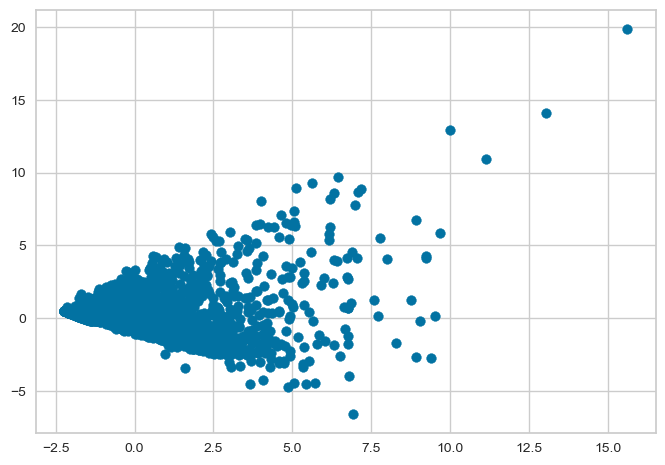

In [1299]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'eucledian distance')

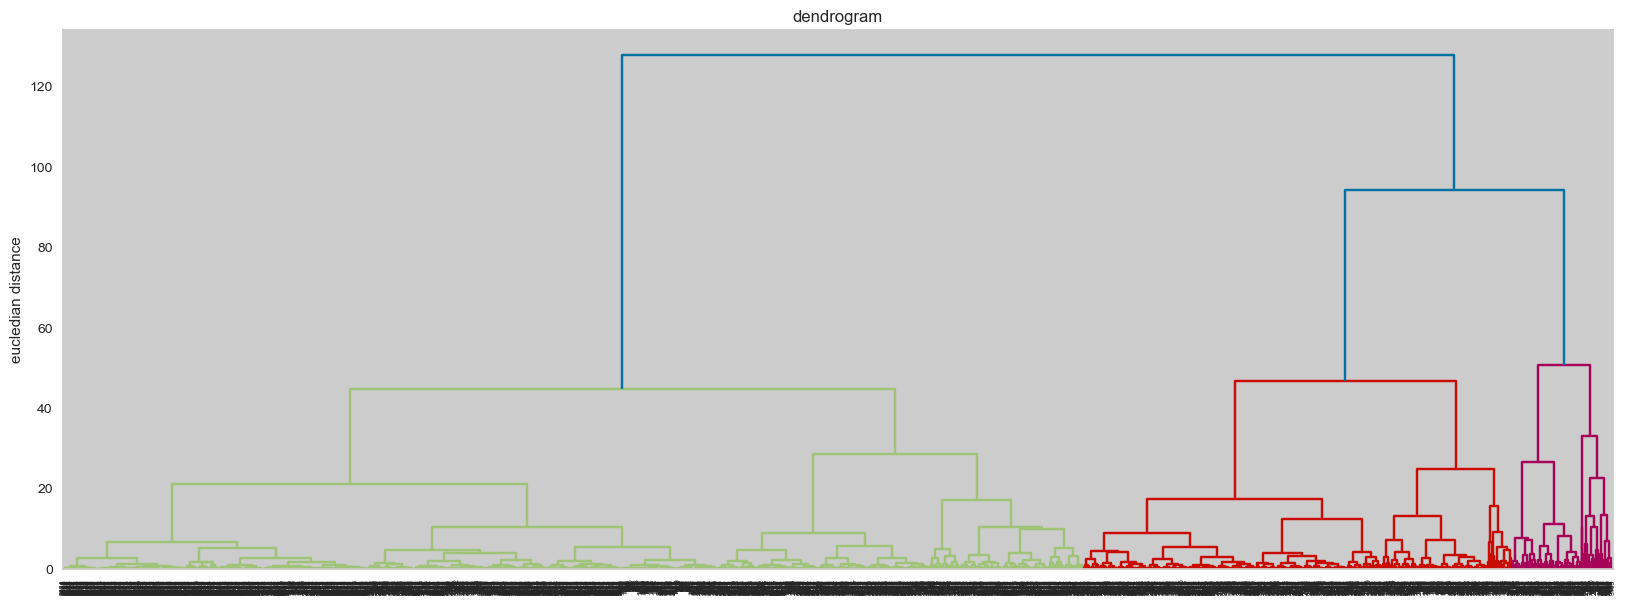

In [1310]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendrograms")

sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('dendrogram')

plt.ylabel('eucledian distance')

In [1311]:
from sklearn.cluster import AgglomerativeClustering



In [1312]:
#
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_scaled)
print(y_pred_hie.shape)
y_pred_hie


(3999,)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [1313]:
#
(sil(minmax_df, agg_clustering.labels_)*100).round(3)

32.675

In [1314]:
#DBSCAN
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [1315]:
from sklearn.cluster import DBSCAN

In [1316]:
#
dbscan = DBSCAN(eps=2.5, min_samples=21)

In [1317]:
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [1318]:
#
labels = dbscan.labels_

In [1319]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1320]:
#
df['dbscan'] = labels
print(df['dbscan'].value_counts())


dbscan
 0    3791
-1     208
Name: count, dtype: int64


In [1321]:
#
df.groupby(df['dbscan']).agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
dbscan,,,,,,,,,,,,,,
-1,1708.947115,211990.889423,1522.576923,2.509615,1.278846,1.235577,45335.081731,24.754808,3276.389423,9.548077,4768.596154,0.687500,2.581731,0.687500
0,2031.601688,66008.336587,68.482722,2.034819,1.000000,1.000000,15598.138486,10.880243,305.532577,0.925086,4082.893959,0.352941,0.374571,0.352941


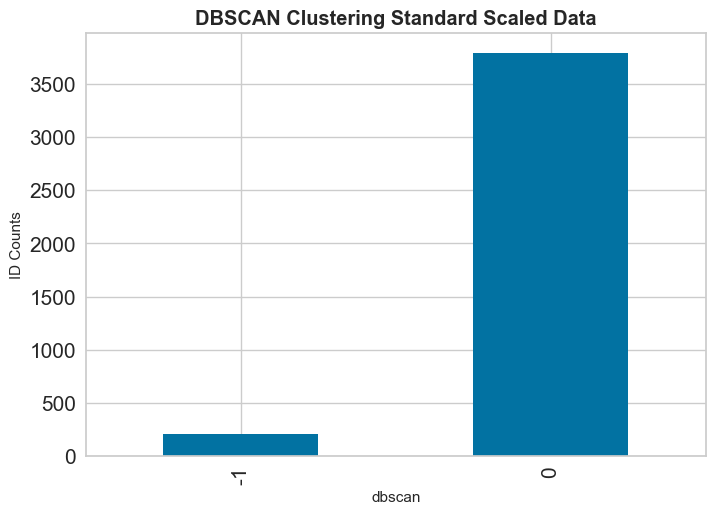

In [1322]:
df.groupby(df['dbscan']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [1323]:
# min max data


In [1324]:
dbscan1 = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan1.fit(minmax_df)

DBSCAN(eps=1, min_samples=22)

In [1325]:
labels1 = dbscan1.labels_


In [1326]:
labels1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [1327]:
#
df['dbscan1'] = labels1
print(df['dbscan1'].value_counts())


dbscan1
0    2518
1    1481
Name: count, dtype: int64


In [1328]:
#
df.groupby(df['dbscan1']).agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,Hierarchical_Labels,dbscan
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
dbscan1,,,,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,0.268070,0.0,-0.025814
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,0.865631,1.0,-0.096556


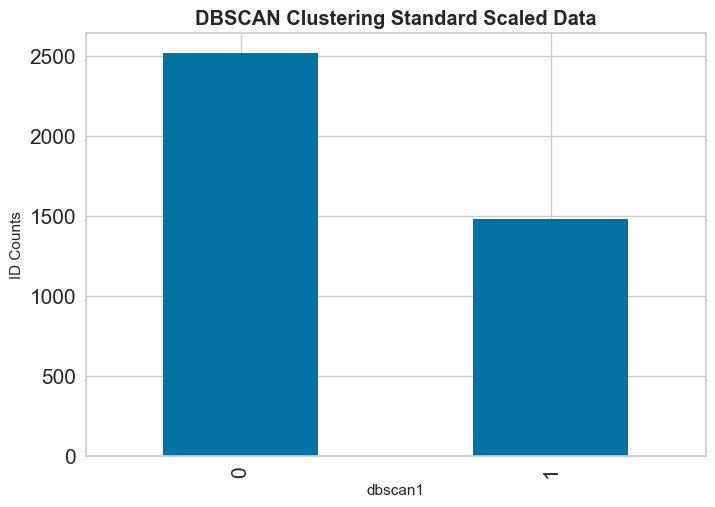

In [1329]:
df.groupby(df['dbscan1']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [1330]:
#
cluster1 = pd.DataFrame(df.loc[df.dbscan==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(df.loc[df.dbscan1==1].mean(),columns= ['Cluster2_Avg'])
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_Avg,Cluster2_Avg
ID,2031.601688,1745.592843
Balance,66008.336587,97053.051317
Qual_miles,68.482722,240.196489
cc1_miles,2.034819,2.661715
cc2_miles,1.000000,1.015530
cc3_miles,1.000000,1.018231
Bonus_miles,15598.138486,28905.414585
Bonus_trans,10.880243,15.782579
Flight_miles_12mo,305.532577,857.501013
Flight_trans_12,0.925086,2.599595
